In [17]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, KFold
# k-fold instance for cross validation
kf = KFold(n_splits=10, shuffle=True)

In [31]:
# load data
digits = load_digits()
print(f"Dataset size: {len(digits.data)}")

# filter for digits 1 and 7
mask = (digits.target == 3) | (digits.target == 9)
x_data = digits.data[mask]/digits.data.max()
y_labels = digits.target[mask]
print(f"Filtered dataset size (only label 3 & 9): {len(x_data)}")
mask1 = y_labels == 3
mask2 = y_labels == 9

Dataset size: 1797
Filtered dataset size (only label 3 & 9): 363


Used pixels as features: 18 & 26


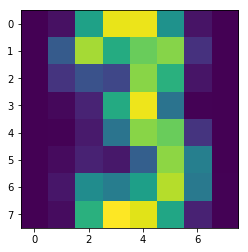

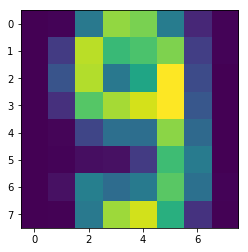

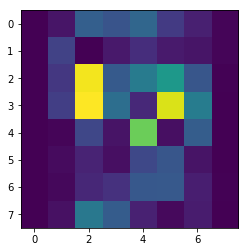

In [56]:
mean1 = np.mean(x_data[mask1], axis=0)
mean2 = np.mean(x_data[mask2], axis=0)
diff = abs(np.mean(x_data[mask1], axis=0)-np.mean(x_data[mask2], axis=0))
plt.imshow(mean1.reshape(8,8))
plt.figure()
plt.imshow(mean2.reshape(8,8))
plt.figure(); plt.imshow(diff.reshape(8,8))
feature_pixels = diff.argsort()[-2:]
# function for data reduction to 2 features
# reduce_dim = lambda x, pixels : x[:,pixels]
def reduce_dim(x):
    out = np.empty((x.shape[0], 2))
    for i in range(x.shape[0]):
        out[i] = np.array( [np.sum(x[i, 24:32]), np.sum(x[i, :8])] )
    return out

print(f"Used pixels as features: {feature_pixels[0]} & {feature_pixels[1]}")

# reduce all feature data
x_features = reduce_dim(x_data)

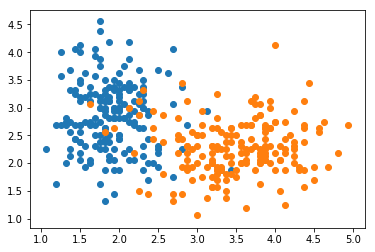

In [57]:
plt.scatter(x_features[mask1,0], x_features[mask1,1])
plt.scatter(x_features[mask2,0], x_features[mask2,1])

In [30]:
x_features

array(0.26644283746556474)